In [ ]:
#KNN Algorithm

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as web

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_infy=pd.read_csv("/content/drive/MyDrive/Python Colab Stuff Sem 3/Daily datasets for ML/INFY_day_data.csv")
print(df_infy)

      Unnamed: 0                       date    close     high      low  \
0              0  2015-01-01 00:00:00+05:30   493.60   495.50   489.23   
1              1  2015-01-02 00:00:00+05:30   503.30   504.77   493.00   
2              2  2015-01-05 00:00:00+05:30   498.98   507.50   494.38   
3              3  2015-01-06 00:00:00+05:30   488.55   496.25   483.53   
4              4  2015-01-07 00:00:00+05:30   490.89   493.69   487.50   
...          ...                        ...      ...      ...      ...   
1902        1902  2022-10-17 00:00:00+05:30  1489.95  1495.00  1475.50   
1903        1903  2022-10-18 00:00:00+05:30  1503.70  1510.95  1497.25   
1904        1904  2022-10-19 00:00:00+05:30  1485.45  1504.95  1481.30   
1905        1905  2022-10-20 00:00:00+05:30  1500.90  1504.00  1474.20   
1906        1906  2022-10-21 00:00:00+05:30  1500.50  1506.00  1491.35   

         open   volume  
0      492.24  2002764  
1      493.00  6778320  
2      502.48  9937024  
3      495.

In [ ]:
corr=df_infy.corr()
print(corr)

            Unnamed: 0     close      high       low      open    volume
Unnamed: 0    1.000000  0.848820  0.849476  0.848348  0.848435 -0.022874
close         0.848820  1.000000  0.999814  0.999830  0.999548 -0.112888
high          0.849476  0.999814  1.000000  0.999738  0.999775 -0.106263
low           0.848348  0.999830  0.999738  1.000000  0.999762 -0.117608
open          0.848435  0.999548  0.999775  0.999762  1.000000 -0.110642
volume       -0.022874 -0.112888 -0.106263 -0.117608 -0.110642  1.000000


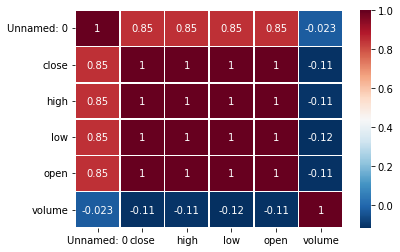

In [ ]:
import seaborn as sb
sb.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,cmap='RdBu_r', annot=True, linewidth=0.5)

In [ ]:
df2_infy = df_infy['close']
df2_infy.head()
df2_infy = pd.DataFrame(df2_infy)  
df2_infy.head()
future_hours = 72
df2_infy['Prediction'] = df2_infy['close'].shift(-future_hours)
df2_infy.head()
x = np.array(df2_infy.drop(['Prediction'], 1))[:-future_hours]
print(x)
y = np.array(df2_infy['Prediction'])[:-future_hours]
print(y)

[[ 493.6 ]
 [ 503.3 ]
 [ 498.98]
 ...
 [1475.95]
 [1491.65]
 [1498.7 ]]
[ 535.65  534.43  530.5  ... 1485.45 1500.9  1500.5 ]


<ipython-input-11-31cd1867f906>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(df2_infy.drop(['Prediction'], 1))[:-future_hours]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.25)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors = 5,metric = 'minkowski',p = 2)
knn_model=knn_regressor.fit(x_train,y_train)
knn_confidence = knn_model.score(x_train,y_train)
print(knn_confidence)

0.9602327322876074


In [ ]:
x_future = np.array(df2_infy.drop(['Prediction'], 1)) [-future_hours:]
print(x_future)

[[1514.45]
 [1473.15]
 [1438.6 ]
 [1444.45]
 [1428.85]
 [1430.35]
 [1489.9 ]
 [1484.15]
 [1515.3 ]
 [1532.9 ]
 [1506.3 ]
 [1503.6 ]
 [1451.15]
 [1471.05]
 [1517.4 ]
 [1549.7 ]
 [1551.05]
 [1543.6 ]
 [1566.1 ]
 [1599.9 ]
 [1616.65]
 [1619.4 ]
 [1602.45]
 [1619.95]
 [1594.1 ]
 [1596.45]
 [1606.25]
 [1582.95]
 [1597.1 ]
 [1575.65]
 [1542.4 ]
 [1537.5 ]
 [1518.15]
 [1521.55]
 [1461.75]
 [1492.95]
 [1464.2 ]
 [1453.  ]
 [1461.3 ]
 [1455.1 ]
 [1457.65]
 [1475.9 ]
 [1511.65]
 [1536.2 ]
 [1544.95]
 [1475.4 ]
 [1432.8 ]
 [1377.05]
 [1390.3 ]
 [1388.55]
 [1377.25]
 [1367.95]
 [1365.45]
 [1380.25]
 [1393.55]
 [1394.7 ]
 [1398.65]
 [1413.45]
 [1393.75]
 [1429.4 ]
 [1455.15]
 [1451.2 ]
 [1462.65]
 [1423.8 ]
 [1428.7 ]
 [1419.9 ]
 [1474.25]
 [1489.95]
 [1503.7 ]
 [1485.45]
 [1500.9 ]
 [1500.5 ]]


<ipython-input-14-cdc55a81680d>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = np.array(df2_infy.drop(['Prediction'], 1)) [-future_hours:]


In [ ]:
y_knn_pred = knn_model.predict(x_future)
print(y_knn_pred)

[1489.65 1460.66 1474.07 1468.92 1442.77 1442.77 1540.37 1483.86 1478.5
 1531.89 1530.8  1555.81 1480.81 1458.9  1478.5  1666.04 1660.26 1661.52
 1713.73 1742.36 1672.33 1672.33 1742.36 1672.33 1706.18 1706.18 1756.66
 1701.85 1706.18 1730.01 1661.52 1572.34 1488.39 1457.07 1447.55 1540.37
 1458.76 1455.32 1447.55 1455.32 1455.32 1460.66 1489.65 1572.34 1661.52
 1460.66 1499.58 1524.64 1665.75 1639.45 1524.64 1540.62 1656.84 1590.2
 1634.39 1634.78 1635.53 1596.95 1634.39 1442.77 1455.32 1492.12 1447.55
 1560.1  1442.77 1552.07 1460.66 1540.37 1555.81 1488.96 1552.28 1552.28]


<ipython-input-16-07363c4ab02e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = prediction


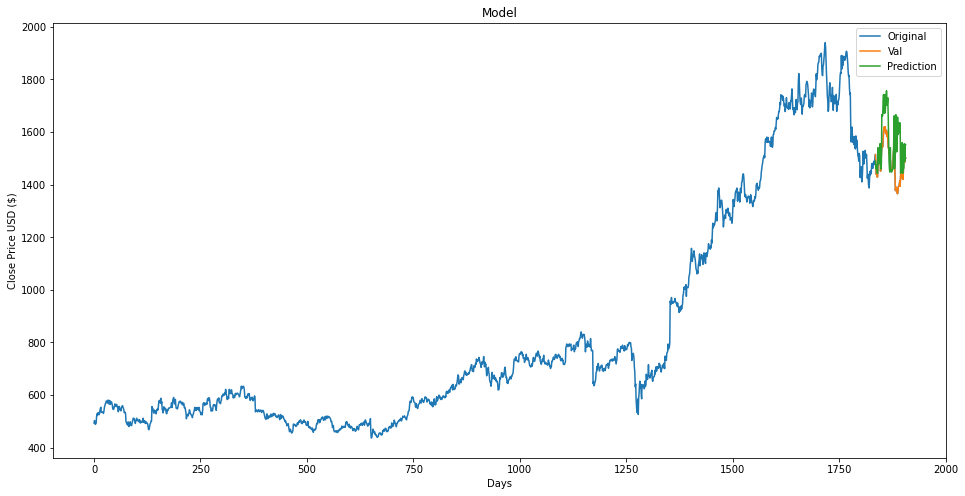

In [ ]:
prediction = y_knn_pred
valid = df2_infy[x.shape[0]:]
valid['Predictions'] = prediction
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df_infy[ 'close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend (['Original', 'Val', 'Prediction'])
plt.show()

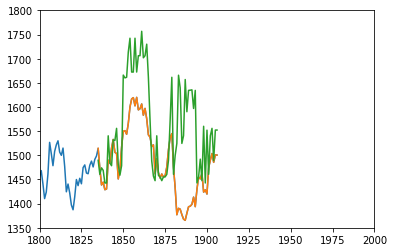

In [ ]:
plt.plot(df_infy['close'])
plt.plot(valid[['close', 'Predictions']])
plt.xlim(1800, 2000)
plt.ylim(1350, 1800)
plt.show()

In [ ]:
#SVM Algorithm

In [ ]:
from sklearn.svm import SVR
svm_regressor = SVR(kernel='linear')
svm_model=svm_regressor.fit(x_train,y_train)
y_svm_pred=svm_model.predict(x_future)

In [ ]:
import sklearn
import math
from sklearn.metrics import r2_score
print("The predicted values of close for the next 'n' days")
print(y_svm_pred)
print("The Accuracy is : " , r2_score(x_train,y_train))

The predicted values of close for the next 'n' days
[1564.89751881 1522.24268712 1486.55928671 1492.60119391 1476.48944145
 1478.03864839 1539.54216485 1533.60353817 1565.77540275 1583.95276447
 1556.480161   1553.69158842 1499.52098499 1520.07379736 1567.94429248
 1601.30388246 1602.69816871 1595.00377413 1618.24187856 1653.15067549
 1670.45015323 1673.29036598 1655.78432732 1673.85840854 1647.16040856
 1649.58749945 1659.70898495 1635.6446368  1650.25882245 1628.10516288
 1593.76440854 1588.70366581 1568.71889598 1572.23043176 1510.46871418
 1542.69221903 1512.99908557 1501.43167356 1510.00395207 1503.6005633
 1506.23421513 1525.08289987 1562.0056658  1587.36101976 1596.39806038
 1524.56649756 1480.56901978 1422.99016101 1436.67482252 1434.86741438
 1423.19672193 1413.59163876 1411.00962715 1426.29513583 1440.03143759
 1441.21916292 1445.29874126 1460.58424996 1440.23799853 1477.05748404
 1503.65220354 1499.57262522 1511.39823835 1471.273778   1476.33452075
 1467.24583993 1523.378772

<ipython-input-23-15b7a8c82bc6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = prediction


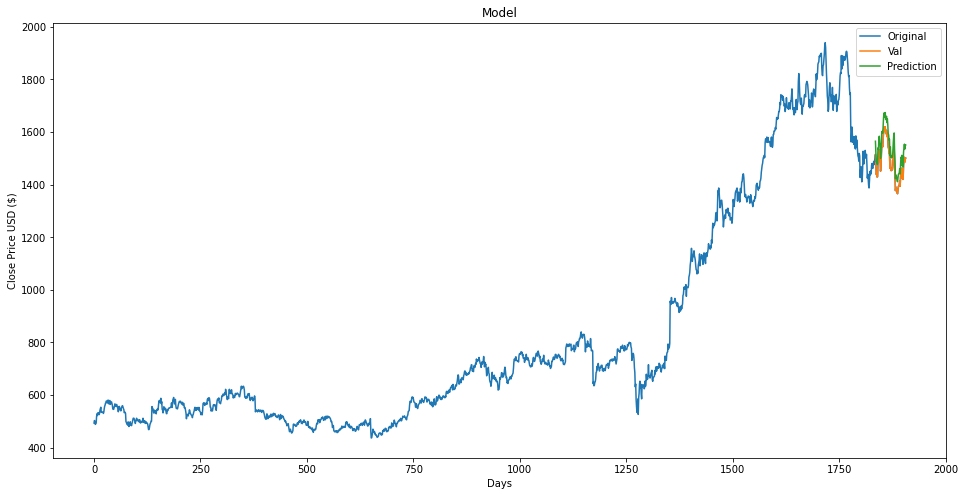

In [ ]:
prediction = y_svm_pred
valid = df2_infy[x.shape[0]:]
valid['Predictions'] = prediction
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df_infy[ 'close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend (['Original', 'Val', 'Prediction'])
plt.show()

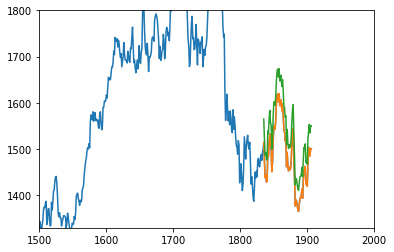

In [ ]:
plt.plot(df_infy['close'])
plt.plot(valid[['close', 'Predictions']])
plt.xlim(1500, 2000)
plt.ylim(1330,1800)
plt.show()